In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared


import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
path = '/Users/Farid/Downloads/woolsey-selected/'

sensor_interest_1 = pd.read_csv(path+'sensor_interest_1 764632.txt')
print('sensor_interest_1: ', sensor_interest_1.shape)

sensor_interest_2 = pd.read_csv(path+'sensor_interest_2 764848.txt')
print('sensor_interest_2: ', sensor_interest_2.shape)

sensor_interest_3 = pd.read_csv(path+'sensor_interest_3 764632.txt')
print('sensor_interest_3: ', sensor_interest_3.shape)

sensor_interest_1:  (9216, 38)
sensor_interest_2:  (9216, 38)
sensor_interest_3:  (9216, 38)


In [30]:
from datetime import datetime, timedelta

# Define the starting date
start_date = datetime(2023, 10, 1)  # start from 1st October 2023

# Define the number of days
n_days = 19

# Create the list of days
days = [(start_date + timedelta(days=i)).strftime('%m/%d') for i in range(n_days)]
print('days: ', days)


days:  ['10/01', '10/02', '10/03', '10/04', '10/05', '10/06', '10/07', '10/08', '10/09', '10/10', '10/11', '10/12', '10/13', '10/14', '10/15', '10/16', '10/17', '10/18', '10/19']


/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/3001612389.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/3001612389.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/3001612389.py:29: SettingWithCopyWarning: 
A value is

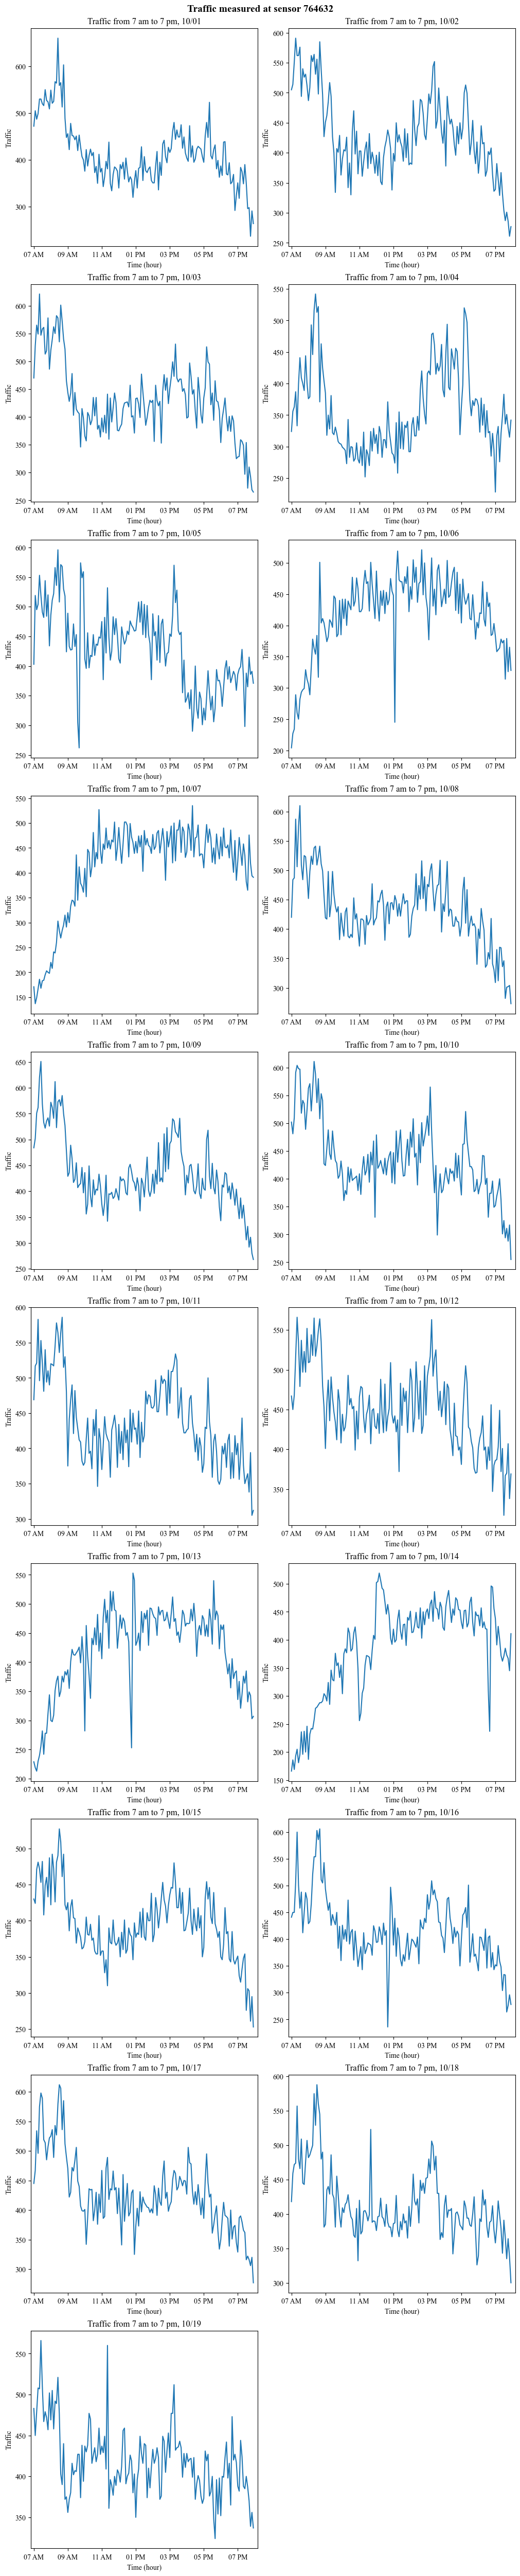

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/3001612389.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/3001612389.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/3001612389.py:76: SettingWithCopyWarning: 
A value is

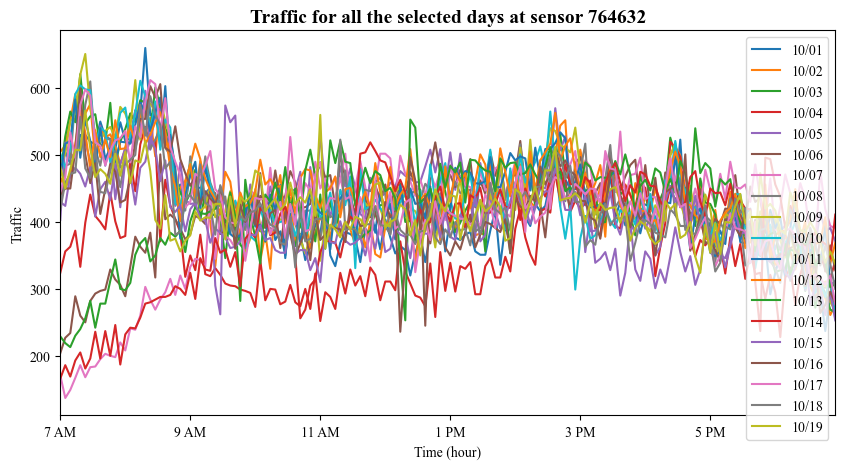

In [45]:

################################################################################################
sensor_interest = sensor_interest_1
sensor_id = 764632
################################################################################################


#####   Subplots
#####


# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')


# Calculate number of rows required for subplots
n = len(days)
nrows = n // 2 if n % 2 == 0 else n // 2 + 1

# Initialize figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(10, nrows*5), constrained_layout=True)
axs = axs.flatten()  # flatten array to make indexing easier

fig.suptitle(f'Traffic measured at sensor {sensor_id}', fontsize=14, weight='bold')

for i, day in enumerate(days):
    ax = axs[i]  # current subplot

    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # x values - use 'Time' values
    time = time_series_data['Time']

    # Create scatter plot
    ax.plot(time, traffic)

    # Set x-axis format and locator
    hours = mdates.DateFormatter('%I %p')
    hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_major_formatter(hours)

    # Adjust x limits to start slightly before 7 AM and end at 7 PM
    start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
    end_time = time.max().replace(hour=20, minute=10, second=0)
    ax.set_xlim(start_time, end_time)

    # Set axis titles
    ax.set_xlabel('Time (hour)')
    ax.set_ylabel('Traffic')
    ax.set_title('Traffic from 7 am to 7 pm, '+day)

# If there are more subplots than days (i.e. an even number of subplots), remove the extra one
if len(days) % 2 != 0:
    fig.delaxes(axs[-1])  

plt.show()

#####   Additional 1-plot
#####


# Define a list of markers
markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', '.', ',']

fig, ax = plt.subplots(figsize=(10, 5))

for i, day in enumerate(days):
    time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]
    time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

    # Filter out data outside of 7 AM to 7 PM
    time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

    # y values
    traffic = time_series_data['10']

    # Plot the data for all series with different markers for each day
    if n_days < 10:
        ax.plot(np.arange(len(traffic)), traffic, label=day, marker=markers[i%len(markers)])
    else:
        ax.plot(np.arange(len(traffic)), traffic, label=day)  # Use modulus to prevent out of index errors

# Set x-axis ticks and labels
x_ticks = np.linspace(0, len(traffic), 7)  # generate 7 evenly spaced x-axis locations
time_labels = ['7 AM', '9 AM', '11 AM', '1 PM', '3 PM', '5 PM', '7 PM']  # corresponding time labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(time_labels)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = np.arange(len(traffic)).min()  # 10 minutes before 7 AM
end_time = np.arange(len(traffic)).max()  # 10 minutes after 7 PM
ax.set_xlim(start_time, end_time)

# Set labels and title for the combined plot
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title(f'Traffic for all the selected days at sensor {sensor_id}', fontsize=14, weight='bold')
ax.legend()

plt.show()

/var/folders/l0/yttdmtl97n7fd1v82xdlzb7c0000gn/T/ipykernel_43997/4281736183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])


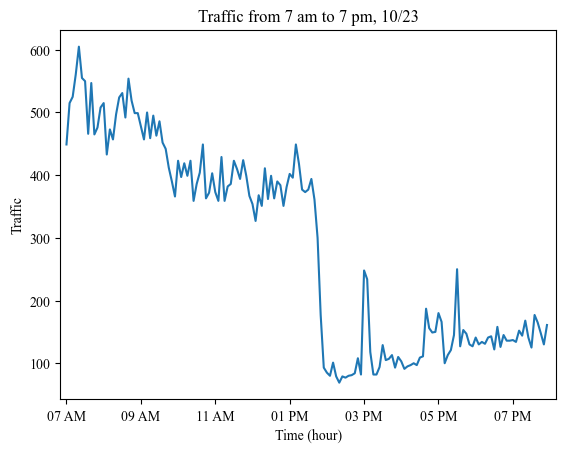

In [27]:
day = "10/23"
################################################################################################


# Set default font to 'Times New Roman'
rc('font', family='Times New Roman')


time_series_data = sensor_interest[sensor_interest['Time'].str.startswith(day)]

# Ensure 'Time' column is in datetime format
time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])

# Filter out data outside of 7 AM to 7 PM
time_series_data = time_series_data[(time_series_data['Time'].dt.hour >= 7) & (time_series_data['Time'].dt.hour <= 19)]

# y values
traffic = time_series_data['10']

# x values - use 'Time' values
time = time_series_data['Time']

fig, ax = plt.subplots()

# Create scatter plot
ax.plot(time, traffic)

# Set x-axis format and locator
hours = mdates.DateFormatter('%I %p')
hour_locator = mdates.HourLocator(interval=2)  # put a tick on every 2 hours
ax.xaxis.set_major_locator(hour_locator)
ax.xaxis.set_major_formatter(hours)

# Adjust x limits to start slightly before 7 AM and end at 7 PM
start_time = time.min().replace(hour=6, minute=50, second=0)  # 10 minutes before 7 AM
end_time = time.max().replace(hour=20, minute=10, second=0)
ax.set_xlim(start_time, end_time)

# Set axis titles
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Traffic')
ax.set_title('Traffic from 7 am to 7 pm, '+day)

plt.show()
